# Resumos Estatísticos dos Dados

Fonte de dados: Painel de Precificação da ANS


In [19]:
# Compartilhamento de arquivo no Drive
id_link = "1KEv9rvTq62hiQeMww25WbDrZr_nmzPpg"

## Bibliotecas utilizadas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Versões dos pacotes usados neste jupyter notebook

%reload_ext watermark
%watermark -a "Mentoria DSA 2021 - Turma 43" --iversions

Author: Mentoria DSA 2021 - Turma 43

matplotlib: 3.2.2
IPython   : 5.5.0
numpy     : 1.19.5
pandas    : 1.1.5



In [12]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

## Carregamento dos dados do Google Drive

In [ ]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [20]:
downloaded = drive.CreateFile({'id':id_link}) 
downloaded.GetContentFile('dfPrecoMensal.csv')  
dfDados = pd.read_csv('dfPrecoMensal.csv', sep = ",", decimal='.', error_bad_lines=False)

In [21]:
dfDados.head()

,contratacao,segmentacao,in_obstetricia,cobertura,abrangencia,fator,acomodacao,internacao,cd_faixa_etaria,nm_regiao,mensalidade
0,Individual ou familiar,Ambulatorial e Hospitalar,1,Médico-hospitalar,Nacional,Co-participação,Coletiva,Ausente,1,Sul,221.837
1,Individual ou familiar,Ambulatorial e Hospitalar,1,Médico-hospitalar,Nacional,Co-participação,Coletiva,Ausente,2,Sul,232.932
2,Individual ou familiar,Ambulatorial e Hospitalar,1,Médico-hospitalar,Nacional,Co-participação,Coletiva,Ausente,3,Sul,255.115
3,Individual ou familiar,Ambulatorial e Hospitalar,1,Médico-hospitalar,Nacional,Co-participação,Coletiva,Ausente,4,Sul,288.393
4,Individual ou familiar,Ambulatorial e Hospitalar,1,Médico-hospitalar,Nacional,Co-participação,Coletiva,Ausente,5,Sul,332.759


In [24]:
dfDados.shape

(100886, 11)

In [26]:
dfDados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100886 entries, 0 to 100885
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   contratacao      100886 non-null  object 
 1   segmentacao      100886 non-null  object 
 2   in_obstetricia   100886 non-null  int64  
 3   cobertura        100886 non-null  object 
 4   abrangencia      100886 non-null  object 
 5   fator            100886 non-null  object 
 6   acomodacao       100886 non-null  object 
 7   internacao       100886 non-null  object 
 8   cd_faixa_etaria  100886 non-null  int64  
 9   nm_regiao        100886 non-null  object 
 10  mensalidade      100886 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 8.5+ MB


## Análise Exploratória

In [28]:
# Verificação de valores missings (ausentes)
dfDados.isna().sum()

contratacao        0
segmentacao        0
in_obstetricia     0
cobertura          0
abrangencia        0
fator              0
acomodacao         0
internacao         0
cd_faixa_etaria    0
nm_regiao          0
mensalidade        0
dtype: int64

In [40]:
# Conversão atributos em dados categóricos, com exceção do valor do plano
for c in dfDados.columns:
  if dfDados[c].dtype != "float64":
    dfDados[c] = dfDados[c].astype("category")

In [41]:
dfDados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100886 entries, 0 to 100885
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   contratacao      100886 non-null  category
 1   segmentacao      100886 non-null  category
 2   in_obstetricia   100886 non-null  category
 3   cobertura        100886 non-null  category
 4   abrangencia      100886 non-null  category
 5   fator            100886 non-null  category
 6   acomodacao       100886 non-null  category
 7   internacao       100886 non-null  category
 8   cd_faixa_etaria  100886 non-null  category
 9   nm_regiao        100886 non-null  category
 10  mensalidade      100886 non-null  float64 
dtypes: category(10), float64(1)
memory usage: 1.7 MB


### Variável Target

In [46]:

dfDados['mensalidade'].describe()

count    100886.000000
mean        501.571873
std         563.642598
min          11.900000
25%         200.921000
50%         339.076500
75%         594.062000
max       13739.635000
Name: mensalidade, dtype: float64

Text(0.5, 1.0, 'Histograma - Mensalidade')

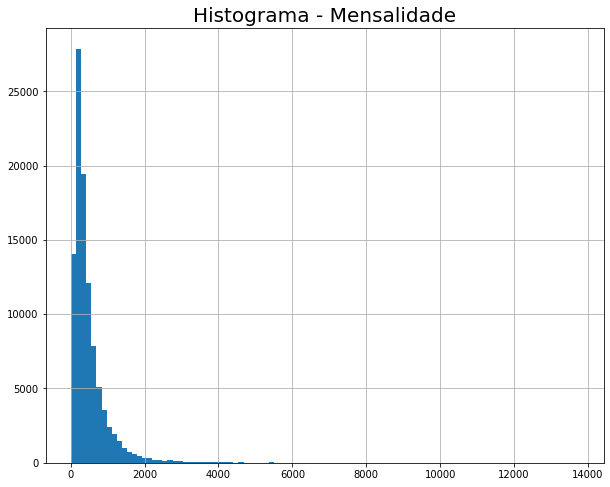

In [72]:
dfDados['mensalidade'].hist(bins=100, figsize=(10,8)).set_title("Histograma - Mensalidade", fontsize=20)

Text(0.5, 1.0, 'Boxplot - Mensalidade')

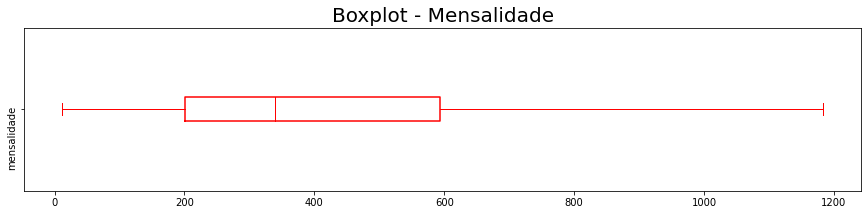

In [93]:
boxprops = dict(linestyle='-', linewidth=1.5, color = 'r')
dfDados.boxplot(column=['mensalidade'], 
                vert=False, 
                grid=False,
                showfliers=False, 
                rot=90, 
                fontsize=10, 
                figsize=(15,3),
                color=dict(boxes='r', whiskers='r', medians='r', caps='r'),
                boxprops=boxprops).set_title("Boxplot - Mensalidade", fontsize=20)

## Variáveis categóricas

In [97]:
pd.crosstab(index=dfDados['abrangencia'], columns="count")

col_0,count
abrangencia,
Estadual,9038
Grupo de estados,2324
Grupo de municípios,44554
Municipal,9482
Nacional,35488


In [98]:
pd.crosstab(index=dfDados['acomodacao'], columns="count")

col_0,count
acomodacao,
Coletiva,50616
Individual,44486
Não identificado,30
Não se aplica,5754


In [113]:
pd.crosstab(index=dfDados['cd_faixa_etaria'], columns="count")

col_0,count
cd_faixa_etaria,
1,10058
2,10070
3,10074
4,10081
5,10088
6,10097
7,10101
8,10103
9,10102


In [99]:
pd.crosstab(index=dfDados['cobertura'], columns="count")

col_0,count
cobertura,
Médico-hospitalar,100886


In [100]:
pd.crosstab(index=dfDados['contratacao'], columns="count")

col_0,count
contratacao,
Coletivo por adesão,62551
Individual ou familiar,38335


In [102]:
pd.crosstab(index=dfDados['fator'], columns="count")

col_0,count
fator,
Ausente,40715
Co-participação,52233
Franquia,1340
Franquia + Co-participação,6598


In [103]:
pd.crosstab(index=dfDados['in_obstetricia'], columns="count")

col_0,count
in_obstetricia,
0,10536
1,90350


In [111]:
pd.crosstab(index=dfDados['in_obstetricia'], columns=dfDados['cd_faixa_etaria'], margins=True, margins_name="Total")

cd_faixa_etaria,1,2,3,4,5,6,7,8,9,10,Total
in_obstetricia,,,,,,,,,,,
0,1048,1050,1051,1050,1054,1054,1053,1055,1060,1061,10536
1,9010,9020,9023,9031,9034,9043,9048,9048,9042,9051,90350
Total,10058,10070,10074,10081,10088,10097,10101,10103,10102,10112,100886


In [107]:
pd.crosstab(index=dfDados['internacao'], columns="count")

col_0,count
internacao,
Ausente,79396
Parcial com internação,19341
Parcial sem internação,1760
Total,389


In [108]:
pd.crosstab(index=dfDados['nm_regiao'], columns='count')

col_0,count
nm_regiao,
Centro-Oeste,10828
Nordeste,16764
Norte,7933
Sudeste,46134
Sul,19227


In [109]:
pd.crosstab(index=dfDados['segmentacao'], columns="count")

col_0,count
segmentacao,
Ambulatorial,5754
Ambulatorial e Hospitalar,90712
Hospitalar,4420


In [110]:
pd.crosstab(index=dfDados['segmentacao'], columns=dfDados['nm_regiao'], margins=True, margins_name="Total")

nm_regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul,Total
segmentacao,,,,,,
Ambulatorial,280,939,230,2775,1530,5754
Ambulatorial e Hospitalar,9978,15105,7223,41479,16927,90712
Hospitalar,570,720,480,1880,770,4420
Total,10828,16764,7933,46134,19227,100886


In [112]:
pd.crosstab(index=dfDados['contratacao'], columns=dfDados['nm_regiao'], margins=True, margins_name="Total")

nm_regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul,Total
contratacao,,,,,,
Coletivo por adesão,7890,11127,6203,26085,11246,62551
Individual ou familiar,2938,5637,1730,20049,7981,38335
Total,10828,16764,7933,46134,19227,100886
